In [11]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define constants
IMG_WIDTH, IMG_HEIGHT = 64, 64
person_folders = ['person1', 'person2']  # Add more folder names as needed
NUM_CLASSES = len(person_folders)

# Load the images and labels
X_data = []
y_data = []

for i, folder in enumerate(person_folders):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        X_data.append(img)
        y_data.append(i)  # Assign label based on the folder index

# Convert lists to numpy arrays
X_data = np.array(X_data)
y_data = np.array(y_data)

# Normalize pixel values to range [0, 1]
X_data = X_data.astype('float32') / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a TensorBoard callback to log data
log_dir = "logs/fit"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with the TensorBoard callback
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

# Save the trained model
model.save('face_recognition_cnn_model.h5')

# Calculate accuracy
loss, accuracy = model.evaluate(X_data, y_data)
print("Accuracy:", accuracy)


Epoch 1/10
3/3 [==============================] - 3s 430ms/step - loss: 0.6854 - accuracy: 0.3194 - val_loss: 0.5499 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 0s 170ms/step - loss: 0.4805 - accuracy: 1.0000 - val_loss: 0.2179 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 168ms/step - loss: 0.1878 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 170ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 6.1362e-04 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 174ms/step - loss: 7.5663e-04 - accuracy: 1.0000 - val_loss: 1.0971e-04 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 170ms/step - loss: 2.1380e-04 - accuracy: 1.0000 - val_loss: 2.1589e-05 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 167ms/step - loss: 5.2529e-05 - accuracy: 1.0000 - val_loss: 3.7286e-06 - val_accuracy:

In [12]:
%load_ext tensorboard 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 16732), started 23:40:37 ago. (Use '!kill 16732' to kill it.)

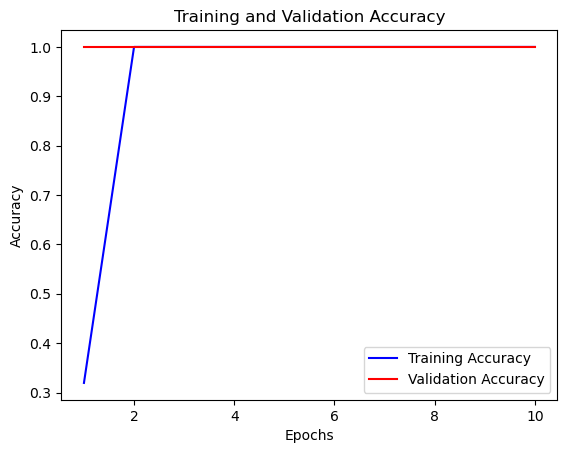

In [14]:
import matplotlib.pyplot as plt

# Access the accuracy values from history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the accuracy values
epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

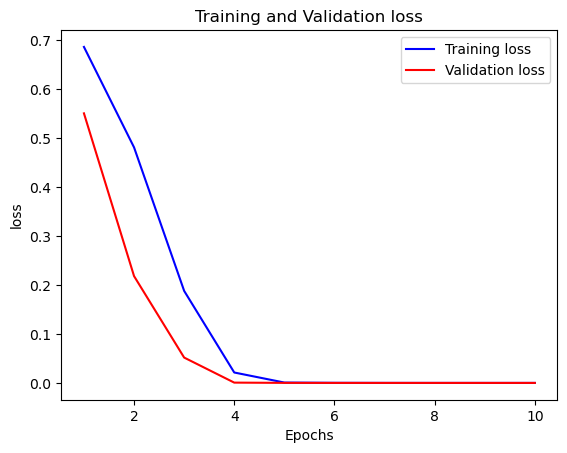

In [15]:

# Access the accuracy values from history
training_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']

# Plot the accuracy values
epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'b', label='Training loss')
plt.plot(epochs, validation_accuracy, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()